<a href="https://colab.research.google.com/github/2loopoff/MLHomeworks/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BA%D0%B0_3_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boston housing dataset

Use the data and model from the seminar:

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
columns = ["CRIM", "RM", "LSTAT"]

data = load_boston()
X = pd.DataFrame(data.data, columns=data.feature_names)[columns]
X /= X.max()
y = data.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=50, random_state=42)

model = make_pipeline(
    PolynomialFeatures(9, include_bias=False),
    Ridge(alpha=0.1)
)

ff = model.fit(X_train, y_train)

print('train mse = ', mean_squared_error(y_train, model.predict(X_train)))
print('test mse = ', mean_squared_error(y_test, model.predict(X_test)))

train mse =  19.312028078112938
test mse =  8.517501881762888


# Task 1

Use `sklearn.model_selection.cross_validate` to perform K-fold cross-validation of the model above. Plot histograms of train and test scores (`"neg_mean_squared_error"`) on the same plot.

Do that for 10 and 100 folds.

See the docs for more details about the function: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html

In [ ]:
from sklearn.model_selection import cross_validate
_NCV = (10,100)
_VARS = ('test_neg_mean_squared_error','train_neg_mean_squared_error')
_COL = ('red','blue')

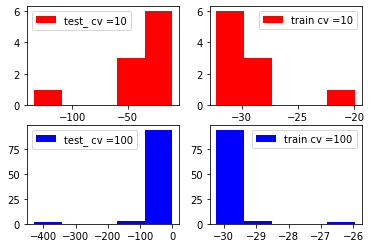

In [ ]:


# for var in _VARS: print(var,':',scores[var])
i = 1
for j,n in enumerate(_NCV):
  scores = cross_validate(Ridge(alpha=0.1), X, y, cv=n,
                          scoring=('r2', 'neg_mean_squared_error'),
                          return_train_score=True)
  for var in _VARS: 
    plt.subplot(2,2,i)
    plt.hist(scores[var],label=var[:5]+' cv ='+str(n),bins=5,color=_COL[j])
    plt.legend()
    i+=1

Как построить эти гистограммы на одном канвасе я не знаю... (В плане того, что они абсолютно разные). Нормировать? 
